In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib
import datetime as dt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from tensorflow import keras
from keras.layers.convolutional import MaxPooling1D
from keras import optimizers
from matplotlib import pyplot
from keras.layers import Dropout
import tensorflow as tf
# lstm autoencoder recreate sequence\
from numpy import array
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import LeakyReLU
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from pandas.tseries.offsets import *

jan_to_jun_2009 = pd.read_csv("../input/thesis/jan_to_jun_2009.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jul_to_dec_2009 = pd.read_csv("../input/thesis/jul_to_dec_2009.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jan_to_jun_2010 = pd.read_csv("../input/thesis/jan_to_aug_2010.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jul_to_dec_2010 = pd.read_csv("../input/thesis/sep_to_dec_2010.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jan_to_jun_2011 = pd.read_csv("../input/thesis/jan_to_jun_2011.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jul_to_dec_2011 = pd.read_csv("../input/thesis/jul_to_dec_2011.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jan_to_jun_2012 = pd.read_csv("../input/thesis/jan_to_jun_2012.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP']) 
jul_to_dec_2012 = pd.read_csv("../input/thesis/jul_to_dec_2012.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jan_to_jun_2013 = pd.read_csv("../input/thesis/jan_to_jun_2013.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jul_to_dec_2013 = pd.read_csv("../input/thesis/jul_to_dec_2013.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jan_to_jun_2014 = pd.read_csv("../input/thesis/jan_to_jun_2014.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jul_to_dec_2014 = pd.read_csv("../input/thesis/jul_to_dec_2014.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jan_to_jun_2015 = pd.read_csv("../input/thesis/jan_to_jun_2015.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jul_to_dec_2015 = pd.read_csv("../input/thesis/jul_to_dec_2015.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jan_to_jun_2016 = pd.read_csv("../input/thesis/jan_to_jun_2016.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jul_to_dec_2016 = pd.read_csv("../input/thesis/jul_to_dec_2016.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jan_to_jun_2017 = pd.read_csv("../input/thesis/jan_to_jun_2017.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jul_to_dec_2017 = pd.read_csv("../input/thesis/jul_to_dec_2017.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jan_to_jun_2018 = pd.read_csv("../input/thesis/jan_to_jun_2018.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jul_to_dec_2018 = pd.read_csv("../input/thesis/jul_to_dec_2018.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jan_to_jun_2019 = pd.read_csv("../input/thesis/jan_to_jun_2019.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jul_to_dec_2019 = pd.read_csv("../input/thesis/jul_to_dec_2019.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])


#ALL Files are concatenated together 

df = pd.concat([jan_to_jun_2009,jul_to_dec_2009,jan_to_jun_2010,jul_to_dec_2010,jan_to_jun_2011,jul_to_dec_2011,jan_to_jun_2012,jul_to_dec_2012,jan_to_jun_2013,jul_to_dec_2013,jan_to_jun_2014,jul_to_dec_2014,jan_to_jun_2015,jul_to_dec_2015,jan_to_jun_2016,jul_to_dec_2016,jan_to_jun_2017,jul_to_dec_2017,jan_to_jun_2018,jul_to_dec_2018,jan_to_jun_2019,jul_to_dec_2019])


#Instrument type Equity is selected.

df = df.loc[df['RFDE_INSTR_TYPE'] == 'REG_DL_INSTR_EQ']

df =df.reset_index()
#Renaming of the column 

df = df.rename(columns={'VALUE (in Rs)': 'Sale'})

#Converting the TR_DATE columns which denotes the transaction date into date time formate. 

df['TR_DATE'] = df['TR_DATE'].astype('datetime64[D]')


def DataFrameCreation(df):
    
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df1['Date'] = df['TR_DATE'].values
    df1['Sale'] = df['Sale'].values
    df2['Date'] = df['TR_DATE'].values
    df2['Inflation-Rate'] = df['Inflation-Rate'].values
    df2['BSE_Close'] = df['BSE_Close'].values
    df2['FDI-Inward'] = df['FDI-Inward'].values
    df2['IIP'] = df['IIP'].values
    df2['unemployment-rate'] = df['unemployment-rate'].values
    df2['forex'] = df['foreign-exchange'].values
    df2['GDP-Growth'] = df['GDP-Growth-Rate'].values
    df2['FDI-Growth'] = df['FDI-Growth-Rate'].values
    df2['twitter'] = df['twitter-sentiment'].values
    df2['Real-GDP'] = df['Real-GDP'].values


#Data is day wise distributed. Thus summing together to get the total sum of Equity instrument sold per day 

    df1 = df1.groupby(['Date']).sum()

    df1 = df1.reset_index(level='Date')

#Getting the exact value of different macro-economic variables per day. 

    df2 = df2.groupby(['Date'], as_index=False).mean()


#Formulating the dataset with columns Date, Sale, and macro-economic variables. 

    df1['BSE_Close'] = df1['Date'].map(df2.set_index('Date')['BSE_Close'])
    df1['FDI-Inward'] = df1['Date'].map(df2.set_index('Date')['FDI-Inward'])
    
    df1['IIP'] = df1['Date'].map(df2.set_index('Date')['IIP'])
    df1['forex'] = df1['Date'].map(df2.set_index('Date')['forex'])
    df1['Real-GDP'] = df1['Date'].map(df2.set_index('Date')['Real-GDP'])
    df1['twitter'] = df1['Date'].map(df2.set_index('Date')['twitter'])
    df1['Unemployment-Rate'] = df1['Date'].map(df2.set_index('Date')['unemployment-rate'])
    df1['Inflation-Rate'] = df1['Date'].map(df2.set_index('Date')['Inflation-Rate'])
    df1['GDP-Growth'] = df1['Date'].map(df2.set_index('Date')['GDP-Growth'])
    df1['FDI-Growth'] = df1['Date'].map(df2.set_index('Date')['FDI-Growth'])


    test = df1
    test['Unemployment-Rate'] = test['Unemployment-Rate'].replace(to_replace=0, method='ffill')
    test['FDI-Inward'] = test['FDI-Inward'].fillna(method='ffill')


#For the year 2009 there are 3 dates for which twitter sentiment is missing. They are replaced by the previous values.

    test['twitter'] = test['twitter'].replace(to_replace=-3.000000, method='ffill')
    

    TestingFrame = pd.DataFrame(data=test.values,columns=test.columns)
    return TestingFrame

TestingFrame = DataFrameCreation(df)


In [2]:
TestingFrame

,Date,Sale,BSE_Close,FDI-Inward,IIP,forex,Real-GDP,twitter,Unemployment-Rate,Inflation-Rate,GDP-Growth,FDI-Growth
0,2009-01-01,3.34339e+09,9903.46,35582.4,80.0789,48.2825,1.5,0.0366225,5.566,10.4478,7.86188,0.2
1,2009-01-02,1.54256e+10,9958.22,35582.4,80.0789,48.25,1.5,0.0366225,5.566,10.4478,7.86188,0.2
2,2009-01-05,2.90138e+10,10275.6,35582.4,80.0789,48.5,1.5,0.0973725,5.566,10.4478,7.86188,0.2
3,2009-01-06,4.10181e+10,10335.9,35582.4,80.0788,48.5,1.5,0.0890036,5.566,10.4478,7.86188,0.2
4,2009-01-07,5.93318e+10,9586.88,35582.4,80.0788,48.56,1.5,0.0262706,5.566,10.4478,7.86188,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2019-12-24,3.74599e+10,41461.3,60317.4,115.269,71.23,4.4,0.057151,5.355,9.63455,5.75993,0.02
2929,2019-12-26,8.75855e+10,41163.8,60317.4,115.269,71.28,4.4,0.057151,5.355,9.63455,5.75993,0.02
2930,2019-12-27,5.0846e+10,41575.1,60317.4,115.269,71.45,4.4,0.057151,5.355,9.63455,5.75993,0.02
2931,2019-12-30,5.07739e+10,41558,60317.4,115.269,71.3,4.4,0.057151,5.355,9.63455,5.75993,0.02


In [4]:
TestingFrame.isnull().sum()

Date                   0
Sale                   0
BSE_Close            215
FDI-Inward             0
IIP                    0
forex                  0
Real-GDP               0
twitter                0
Unemployment-Rate      0
Inflation-Rate         0
GDP-Growth             0
FDI-Growth             0
dtype: int64

In [5]:
TestingFrame = TestingFrame.dropna()


from scipy import stats
import numpy as np

def Outlier(DataFrame):
    SalesArray = DataFrame['Sale'].values
    SalesArray = SalesArray.astype(float)

    Zscores = stats.zscore(SalesArray)
    z = np.abs(Zscores)

    threshold = 3
    Outliers = np.where(z > 3)

    Outliers = list(Outliers[0])
    return Outliers 

Outliers = Outlier(TestingFrame)
TestingFrame.drop(TestingFrame.index[Outliers],inplace=True)
TestingFrame.shape



/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(2686, 12)

In [6]:
def scaling(Input_DataFrame):
    
    Input_DataFrame['GDP-Growth'] = Input_DataFrame['GDP-Growth'].div(100)
    #DataAutoencoder['Real-GDP'] = DataAutoencoder['Real-GDP'].div(100)
    Input_DataFrame['Inflation-Rate'] = Input_DataFrame['Inflation-Rate'].div(100)
    Input_DataFrame['Unemployment-Rate'] = Input_DataFrame['Unemployment-Rate'].div(100)


    data_UR = Input_DataFrame['Unemployment-Rate'].to_numpy()
    data_UR = data_UR.reshape(len(data_UR),1)
    data_Inflation_Rate = Input_DataFrame['Inflation-Rate'].to_numpy()
    data_Inflation_Rate = data_Inflation_Rate.reshape(len(data_Inflation_Rate),1)
    data_GDP_Growth = Input_DataFrame['GDP-Growth'].to_numpy()
    data_GDP_Growth = data_GDP_Growth.reshape(len(data_GDP_Growth),1)
    data_FDI_Growth = Input_DataFrame['FDI-Growth'].to_numpy()
    data_FDI_Growth = data_FDI_Growth.reshape(len(data_FDI_Growth),1)


    data_forex = Input_DataFrame.forex.values
    data_forex = data_forex.reshape(len(data_forex),1)
    data_IIP = Input_DataFrame.IIP.values
    data_IIP = data_IIP.reshape(len(data_forex),1)
    data_FDI_Inward = Input_DataFrame['FDI-Inward'].values
    data_FDI_Inward = data_FDI_Inward.reshape(len(data_forex),1)
    data_BSE_Close = Input_DataFrame.BSE_Close.values
    data_BSE_Close = data_BSE_Close.reshape(len(data_BSE_Close),1)
    data_Real_GDP = Input_DataFrame['Real-GDP'].to_numpy()
    data_Real_GDP = data_FDI_Growth.reshape(len(data_Real_GDP),1)
    data_twitter = Input_DataFrame['twitter'].to_numpy()
    data_twitter = data_twitter.reshape(len(data_twitter),1)


# BSE_Close, FDI_inward, IIP, foreign-exchange are normalized using minmax scaler 

    scaler_1 = MinMaxScaler(feature_range=(0, 1))
    data_BSE_Close_normalize = scaler_1.fit_transform(data_BSE_Close)
    scaler_2 = MinMaxScaler(feature_range=(0, 1))
    data_FDI_Inward_normalize = scaler_2.fit_transform(data_FDI_Inward)
    scaler_3 = MinMaxScaler(feature_range=(0, 1))
    data_IIP_normalize = scaler_3.fit_transform(data_IIP)
    scaler_4 = MinMaxScaler(feature_range=(0, 1))
    data_forex_normalize = scaler_4.fit_transform(data_forex)
    scaler_5 = MinMaxScaler(feature_range=(0,1))
    data_Real_GDP_normalize = scaler_5.fit_transform(data_Real_GDP)

#All of the normalized data plus percentage valued features are concatenated together 

    data_normalize = np.concatenate((data_BSE_Close_normalize,data_FDI_Inward_normalize,data_IIP_normalize,data_forex_normalize,data_Real_GDP_normalize,data_twitter,data_UR,data_Inflation_Rate,data_GDP_Growth,data_FDI_Growth),axis=1)
    return data_normalize

In [7]:
DataAutoencoder = pd.DataFrame(data=TestingFrame.values,columns=TestingFrame.columns)
data_normalize = scaling(DataAutoencoder)
data_normalize.shape


#data_normalize = DataForAutoencoder(DataAutoencoder)
X_train = data_normalize.reshape((data_normalize.shape[0],1,data_normalize.shape[1]))

X_train=np.asarray(X_train).astype(np.float32)

X_train_Conv = X_train
X_train_Conv=X_train_Conv.reshape(2686,10,1)

X_train_Conv.shape

model_autoencoder = Sequential()
model_autoencoder.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(10,1)))
model_autoencoder.add(MaxPooling1D(pool_size=2))
model_autoencoder.add(Conv1D(filters=2, kernel_size=3, activation='relu'))
model_autoencoder.add(Flatten())
model_autoencoder.add(RepeatVector(10))
model_autoencoder.add(LSTM(200, activation='relu', return_sequences=True))
model_autoencoder.add(TimeDistributed(Dense(100, activation='relu')))
model_autoencoder.add(TimeDistributed(Dense(1)))
model_autoencoder.compile(loss='mse', optimizer='adam')
# fit network

print(model_autoencoder.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 8, 64)             256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 64)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2, 2)              386       
_________________________________________________________________
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 10, 4)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 10, 200)           164000    
_________________________________________________________________
time_distributed (TimeDistri (None, 10, 100)           2

In [8]:
model_autoencoder.fit(X_train_Conv, X_train_Conv, epochs=200, batch_size=16, verbose=1)

Epoch 1/200
168/168 [==============================] - 3s 19ms/step - loss: 0.0400
Epoch 2/200
168/168 [==============================] - 3s 19ms/step - loss: 0.0077
Epoch 3/200
168/168 [==============================] - 3s 20ms/step - loss: 0.0055
Epoch 4/200
168/168 [==============================] - 3s 20ms/step - loss: 0.0045
Epoch 5/200
168/168 [==============================] - 3s 21ms/step - loss: 0.0035
Epoch 6/200
168/168 [==============================] - 3s 18ms/step - loss: 0.0029
Epoch 7/200
168/168 [==============================] - 4s 24ms/step - loss: 0.0022
Epoch 8/200
168/168 [==============================] - 3s 19ms/step - loss: 0.0018
Epoch 9/200
168/168 [==============================] - 3s 18ms/step - loss: 0.0015
Epoch 10/200
168/168 [==============================] - 3s 20ms/step - loss: 0.0015
Epoch 11/200
168/168 [==============================] - 3s 18ms/step - loss: 0.0013
Epoch 12/200
168/168 [==============================] - 3s 18ms/step - loss: 0.0013
E

168/168 [==============================] - 3s 18ms/step - loss: 4.0242e-04
Epoch 96/200
168/168 [==============================] - 4s 21ms/step - loss: 4.2433e-04
Epoch 97/200
168/168 [==============================] - 3s 20ms/step - loss: 4.3903e-04
Epoch 98/200
168/168 [==============================] - 4s 22ms/step - loss: 4.3871e-04
Epoch 99/200
168/168 [==============================] - 3s 19ms/step - loss: 4.0217e-04
Epoch 100/200
168/168 [==============================] - 4s 21ms/step - loss: 4.4165e-04
Epoch 101/200
168/168 [==============================] - 3s 19ms/step - loss: 3.9272e-04
Epoch 102/200
168/168 [==============================] - 3s 19ms/step - loss: 3.7863e-04
Epoch 103/200
168/168 [==============================] - 3s 21ms/step - loss: 3.9366e-04
Epoch 104/200
168/168 [==============================] - 3s 19ms/step - loss: 4.1789e-04
Epoch 105/200
168/168 [==============================] - 3s 18ms/step - loss: 4.0629e-04
Epoch 106/200
168/168 [================

168/168 [==============================] - 4s 23ms/step - loss: 2.6299e-04
Epoch 188/200
168/168 [==============================] - 3s 21ms/step - loss: 2.7365e-04
Epoch 189/200
168/168 [==============================] - 3s 19ms/step - loss: 2.5577e-04
Epoch 190/200
168/168 [==============================] - 4s 22ms/step - loss: 2.5989e-04
Epoch 191/200
168/168 [==============================] - 3s 19ms/step - loss: 2.7598e-04
Epoch 192/200
168/168 [==============================] - 3s 18ms/step - loss: 2.7790e-04
Epoch 193/200
168/168 [==============================] - 3s 20ms/step - loss: 2.6117e-04
Epoch 194/200
168/168 [==============================] - 3s 20ms/step - loss: 2.5811e-04
Epoch 195/200
168/168 [==============================] - 3s 18ms/step - loss: 2.7203e-04
Epoch 196/200
168/168 [==============================] - 3s 18ms/step - loss: 2.5071e-04
Epoch 197/200
168/168 [==============================] - 4s 21ms/step - loss: 2.5036e-04
Epoch 198/200
168/168 [============

In [9]:
model_autoencoder.save_weights('mymodel.h5')

In [10]:


def encoder_model(Input):
    encoder = Model(inputs=model_autoencoder.inputs, outputs=model_autoencoder.layers[3].output)
    train_encoded = encoder.predict(Input)
    return train_encoded

train_encoded_feature = pd.DataFrame(data=encoder_model(X_train_Conv))
train_encoded_feature['Date'] = TestingFrame['Date'].values
train_encoded_feature['Sale'] = train_encoded_feature['Date'].map(TestingFrame.set_index('Date')['Sale'])
train_encoded_feature.columns = ['encoded-feature-1','encoded-feature-2','encoded-feature-3','encoded-feature-4','Date','Sale']
train_encoded_feature = train_encoded_feature[['Date','encoded-feature-1','encoded-feature-2','encoded-feature-3','encoded-feature-4','Sale']]


def ArrayForForecast(Array):
    TempFrame = pd.DataFrame()
    TempFrame['Sale'] = Array['Sale'].values
    TempFrame['encoded-feature-1'] = Array['encoded-feature-1'].values
    TempFrame['encoded-feature-2'] = Array['encoded-feature-2'].values
    TempFrame['encoded-feature-3'] = Array['encoded-feature-3'].values
    TempFrame['encoded-feature-4'] = Array['encoded-feature-4'].values

    TempFrame['diff-sale'] = TempFrame['Sale'].diff(1)
    TempFrame = TempFrame.dropna()

    TempFrame = TempFrame.reset_index()

    del TempFrame['index']
    del TempFrame['Sale']
    
    TempFrame = TempFrame[['diff-sale','encoded-feature-1','encoded-feature-2','encoded-feature-3','encoded-feature-4']]
    return TempFrame

from numpy import array
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix -1,:], sequences[end_ix -1,0]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
    

    


In [11]:
TempFrame = pd.DataFrame()
TempFrame['Date'] = train_encoded_feature['Date'].values
TempFrame['Sale'] = train_encoded_feature['Sale'].values
TempFrame['encoded-feature-1'] = train_encoded_feature['encoded-feature-1'].values
TempFrame['encoded-feature-2'] = train_encoded_feature['encoded-feature-2'].values
TempFrame['encoded-feature-3'] = train_encoded_feature['encoded-feature-3'].values
TempFrame['encoded-feature-4'] = train_encoded_feature['encoded-feature-4'].values

TempFrame['diff-sale'] = TempFrame['Sale'].diff(1)
TempFrame = TempFrame.dropna()

TempFrame = TempFrame.reset_index()

del TempFrame['index']
del TempFrame['Sale']
    
TempFrame = TempFrame[['Date','diff-sale','encoded-feature-1','encoded-feature-2','encoded-feature-3','encoded-feature-4']]



In [17]:
TempFrame.iloc[2644:2664].shape

(20, 6)

In [31]:
from keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
import math
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.callbacks import LambdaCallback
array_test_forecast = ArrayForForecast(train_encoded_feature).iloc[:2644,0:].to_numpy()

array_test_forecast = np.asarray(array_test_forecast).astype(np.float32)



scaler10 = MinMaxScaler(feature_range=(0, 1))
scaler10 = scaler10.fit(array_test_forecast[:,:1])
normalized_values = scaler10.transform(array_test_forecast[:,:1])


normalized_values_forecast = np.concatenate((normalized_values,array_test_forecast[:,1:]),axis=1)

xForTesting, yForTesting = split_sequences(normalized_values_forecast,21)

xt = xForTesting[:2500,:,:]
yt = yForTesting[:2500]
xv = xForTesting[2500:,:,:]
yv=yForTesting[2500:]

n_features = xForTesting.shape[2]


batch = 8

model_new = Sequential()



batch = 10

model_new = Sequential()

model_new.add(Conv1D(filters=20, kernel_size=10,activation='relu', input_shape=(20,n_features),kernel_regularizer='l2'))
model_new.add(Dropout(0.20))
model_new.add(LSTM(20, activation='relu',return_sequences=True,kernel_regularizer='l2'))
model_new.add(Dropout(0.20))
model_new.add(LSTM(20, activation='relu',kernel_regularizer='l2'))
model_new.add(Dropout(0.20))
model_new.add(Dense(1))

lr = 0.01

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: (1e-4*3) * 10**(epoch / 100))


epoch=200


adam =  keras.optimizers.Adam(lr)
model_new.compile(loss='mse', optimizer=adam)
# fit model
print(model_new.summary())







Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 11, 20)            1020      
_________________________________________________________________
dropout_4 (Dropout)          (None, 11, 20)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 11, 20)            3280      
_________________________________________________________________
dropout_5 (Dropout)          (None, 11, 20)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_6 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

Epoch 1/200
250/250 [==============================] - 4s 16ms/step - loss: 0.0409 - val_loss: 0.0173
Epoch 2/200
250/250 [==============================] - 4s 15ms/step - loss: 0.0098 - val_loss: 0.0172
Epoch 3/200
250/250 [==============================] - 4s 16ms/step - loss: 0.0091 - val_loss: 0.0172
Epoch 4/200
250/250 [==============================] - 4s 15ms/step - loss: 0.0090 - val_loss: 0.0172
Epoch 5/200
250/250 [==============================] - 4s 16ms/step - loss: 0.0090 - val_loss: 0.0172
Epoch 6/200
250/250 [==============================] - 4s 16ms/step - loss: 0.0090 - val_loss: 0.0172
Epoch 7/200
250/250 [==============================] - 4s 16ms/step - loss: 0.0090 - val_loss: 0.0172
Epoch 8/200
250/250 [==============================] - 4s 16ms/step - loss: 0.0090 - val_loss: 0.0172
Epoch 9/200
250/250 [==============================] - 4s 15ms/step - loss: 0.0090 - val_loss: 0.0172
Epoch 10/200
250/250 [==============================] - 4s 15ms/step - loss: 0.009

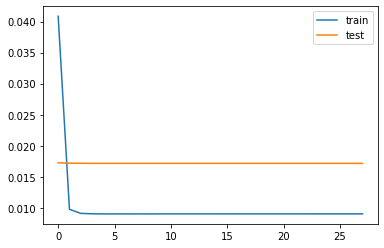

In [33]:




history = model_new.fit(xt, yt,validation_data=(xv, yv),epochs=epoch,batch_size = batch,verbose=1,shuffle=False,callbacks = [lr_schedule,EarlyStopping(monitor='val_loss', patience=20)])



pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()






In [34]:
def ForecastingValue(StartIndex,EndIndex): 
    
    xforecast = ArrayForForecast(train_encoded_feature).iloc[StartIndex:EndIndex,0:].to_numpy()
    
    xforecast = np.asarray(xforecast).astype(np.float32)
    
    scaler11 = MinMaxScaler(feature_range=(0, 1))
    scaler11 = scaler11.fit(xforecast[:,:1])
    
    normalized_values_x_forcaste = scaler11.transform(xforecast[:,:1])
    
    x_forecaste_normalize = np.concatenate((normalized_values_x_forcaste,xforecast[:,1:]),axis=1)
    
    x_forecaste_normalize = x_forecaste_normalize.reshape((1,len(x_forecaste_normalize),5))
    
    yhat = model_new.predict(x_forecaste_normalize)
    
    yhat = yhat.reshape(-1,1)
    
    z = np.zeros((1,1), dtype=int)
    
    yhat = np.append(yhat,z,axis=1)
    yhat = scaler11.inverse_transform(yhat[:,0:1]) 
   
    return yhat


def ForecastingOperation(StartIndex,EndIndex):
    forecasted_value = ForecastingValue(StartIndex,EndIndex)
    forecast = forecasted_value + train_encoded_feature['Sale'][EndIndex - 1]
    return forecast
    


In [35]:
StartIndex = 2644
EndIndex = 2664
forecasted_values = []
for i in range(21):
    forecasted = ForecastingOperation(StartIndex,EndIndex)
    print(forecasted)
    forecasted_values.append(forecasted)
    StartIndex = StartIndex+1
    EndIndex = EndIndex+1



[[1.19341807e+11]]
[[1.12432085e+11]]
[[1.48429031e+11]]
[[9.63029611e+10]]
[[1.11575249e+11]]
[[8.72757838e+10]]
[[8.04159042e+10]]
[[7.80239302e+10]]
[[9.29129397e+10]]
[[1.0026154e+11]]
[[9.95921328e+10]]
[[9.68326709e+10]]
[[1.04234963e+11]]
[[1.35155528e+11]]
[[1.28574664e+11]]
[[1.14223039e+11]]
[[1.89041222e+11]]
[[9.81271828e+10]]
[[4.27531042e+10]]
[[9.28787076e+10]]
[[5.61392476e+10]]


In [36]:
TestingFrame.iloc[2665:]

,Date,Sale,BSE_Close,FDI-Inward,IIP,forex,Real-GDP,twitter,Unemployment-Rate,Inflation-Rate,GDP-Growth,FDI-Growth
2911,2019-12-02,1.46663e+11,40802.2,60317.4,115.269,71.65,4.4,0.057151,5.355,9.63455,5.75993,0.02
2912,2019-12-03,9.45369e+10,40675.4,60317.4,115.269,71.7,4.4,0.057151,5.355,9.63455,5.75993,0.02
2913,2019-12-04,1.09809e+11,40850.3,60317.4,115.269,71.47,4.4,0.057151,5.355,9.63455,5.75993,0.02
2914,2019-12-05,8.55097e+10,40779.6,60317.4,115.269,71.26,4.4,0.057151,5.355,9.63455,5.75993,0.02
2915,2019-12-06,7.86498e+10,40445.2,60317.4,115.269,71.26,4.4,0.057151,5.355,9.63455,5.75993,0.02
2917,2019-12-09,7.62579e+10,40487.4,60317.4,115.269,71.02,4.4,0.057151,5.355,9.63455,5.75993,0.02
2918,2019-12-10,8.39029e+10,40239.9,60317.4,115.269,70.84,4.4,0.057151,5.355,9.63455,5.75993,0.02
2919,2019-12-11,9.12515e+10,40412.6,60317.4,115.269,70.73,4.4,0.057151,5.355,9.63455,5.75993,0.02
2920,2019-12-12,9.05821e+10,40581.7,60317.4,115.269,70.62,4.4,0.057151,5.355,9.63455,5.75993,0.02
2921,2019-12-13,8.78226e+10,41009.7,60317.4,115.269,70.8,4.4,0.057151,5.355,9.63455,5.75993,0.02


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


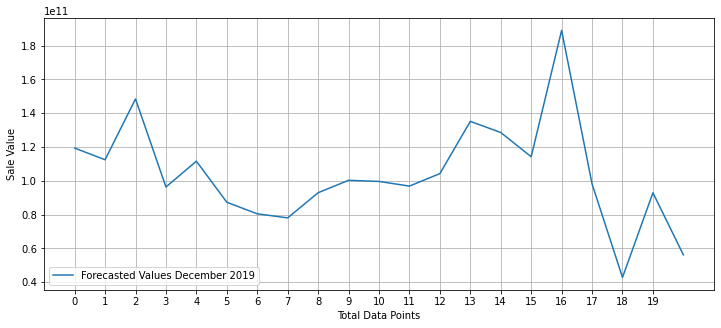

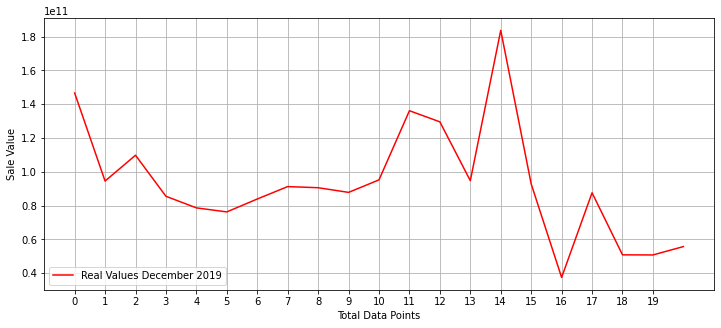

In [37]:
myarray = np.asarray(forecasted_values)
myarray = myarray.reshape(21,1) 

x = TestingFrame.iloc[2665:,:]
x['forecasted'] = myarray
x['forecasted'] = x['forecasted'].astype('float64')


ForecastedFrame = pd.DataFrame()
ForecastedFrame['Date'] = x['Date'].values
ForecastedFrame['forecasted'] = x['forecasted'].values
#ForecastedFrame.set_index('Date',inplace=True)

RealFrame = pd.DataFrame()
RealFrame['Date'] = x['Date'].values
RealFrame['Real'] = x['Sale'].values

plt.figure(figsize=(12,5))
ForecastedFrame['forecasted'].plot(grid = True,label='Forecasted Values December 2019',xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.xlabel('Total Data Points')
plt.ylabel('Sale Value')
plt.legend(loc=3)

plt.figure(figsize=(12,5))
RealFrame['Real'].plot(color='red',label='Real Values December 2019',grid = True,xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.xlabel('Total Data Points')
plt.ylabel('Sale Value')
plt.legend(loc=3)

In [38]:
ypred = np.asarray(forecasted_values)
ypred = ypred.reshape(-1,1)
ytrue = np.asarray(x['Sale'].values)
ytrue = ytrue.reshape(-1,1)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('MAPE: %f' %mean_absolute_percentage_error(ytrue,ypred))

MAPE: 40.098051


In [ ]:
myarray = np.asarray(forecasted_values)
myarray = myarray.reshape(21,1) 

x = NewDataFrame1.iloc[2651:,:]
x['forecasted'] = myarray
x['forecasted'] = x['forecasted'].astype('float64')


ForecastedFrame = pd.DataFrame()
ForecastedFrame['Date'] = x['Date'].values
ForecastedFrame['forecasted'] = x['forecasted'].values
#ForecastedFrame.set_index('Date',inplace=True)

RealFrame = pd.DataFrame()
RealFrame['Date'] = x['Date'].values
RealFrame['Real'] = x['Sale'].values

plt.figure(figsize=(12,5))
ForecastedFrame['forecasted'].plot(grid = True,label='Forecasted Values December 2019',xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.xlabel('Total Data Points')
plt.ylabel('Sale Value')
plt.legend(loc=3)

plt.figure(figsize=(12,5))
RealFrame['Real'].plot(color='red',label='Real Values December 2019',grid = True,xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.xlabel('Total Data Points')
plt.ylabel('Sale Value')
plt.legend(loc=3)

In [ ]:
ypred = np.asarray(forecasted_values)
ypred = ypred.reshape(-1,1)
ytrue = np.asarray(x['Sale'].values)
ytrue = ytrue.reshape(-1,1)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('MAPE: %f' %mean_absolute_percentage_error(ytrue,ypred))